<a href="https://colab.research.google.com/github/xEsseax/test_cases/blob/main/wink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

! ДОПИСАТЬ ВВЕДЕНИЕ

# Введение

Анализ выполнен в рамках тестового задания в команду Wink.

В нашем распоряжении данные продаж некой производственной фармацевтической компании, а также данные о количестве диагностированных пациентов. Данные неидеальны.

Задача: обработать данные и выбрать наиболее важные выводы для демонстрации бизнесу. Ограничений по метрикам по условиям ТЗ нет.

Предварительный план:
1. Чтение и предварительный обзор данных. Изучение датасета на предмет наличия пропусков
2.

# Технический раздел

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [81]:
!pip install --upgrade matplotlib -q

In [82]:
# функция для отрисовки распределения значений в одном столбце
def column_draw(data, column):
  data[column].hist()
  plt.title(data[column].name)
  plt.xlabel('meaning')
  plt.ylabel('quantity')
  plt.show()

In [83]:
# функция для вывода описательной информации столбца
def column_describe(data, column):
  print(f'Количество уникальных значений = {len(data[column].unique())}')
  print()
  print('Количество значений в стоблце:')
  print(data[column].value_counts())

In [84]:
#функция для преобразования дат в datetime с учётом наличия различий в формате записи
def date_transformer(row):
  try:
    return pd.to_datetime(row['Date'], format='%Y-%m-%d %H:%M:%S')
  except:
    return pd.to_datetime(row['Date'], format='%d/%m/%Y %H:%M:%S')


# Чтение и предварительный обзор данных

# Данные по продажам

In [85]:
sales = pd.read_excel('Russia Data Analyst Data Set_original (1).xlsx', sheet_name='Sales')

In [86]:
# предварительный обзор структуры датасета
sales.head()

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales
0,FAM1,Prd1,Cust1,NaN,M.CHF,2019-05-02 00:00:00,473885
1,FAM1,Prd1,Cust1,NaN,M.CHF,28/02/2019 00:00:00,-23694
2,FAM1,Prd1,Cust1,NaN,M.CHF,29/03/2019 00:00:00,23694
3,FAM1,Prd1,Cust1,NaN,M.CHF,31/03/2019 00:00:00,-23694
4,FAM1,Prd1,Cust1,NaN,M.CHF,15/04/2019 00:00:00,-23694


In [87]:
# количество и тип данных
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Family  5576 non-null   object
 1   Product         5576 non-null   object
 2   Customer        5576 non-null   object
 3   Business Unit   3072 non-null   object
 4   Currency        5576 non-null   object
 5   Date            5576 non-null   object
 6   Sales           5576 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 305.1+ KB


Итого, у нас пять с половиной тысяч строк, 7 столбцов, 1 - с числовым типом данных, остальные - строковые. В столбце Business Unit почти 40 процентов явных пропусков.

Дальше посмотрим отдельно на каждый столбец

## Product Family

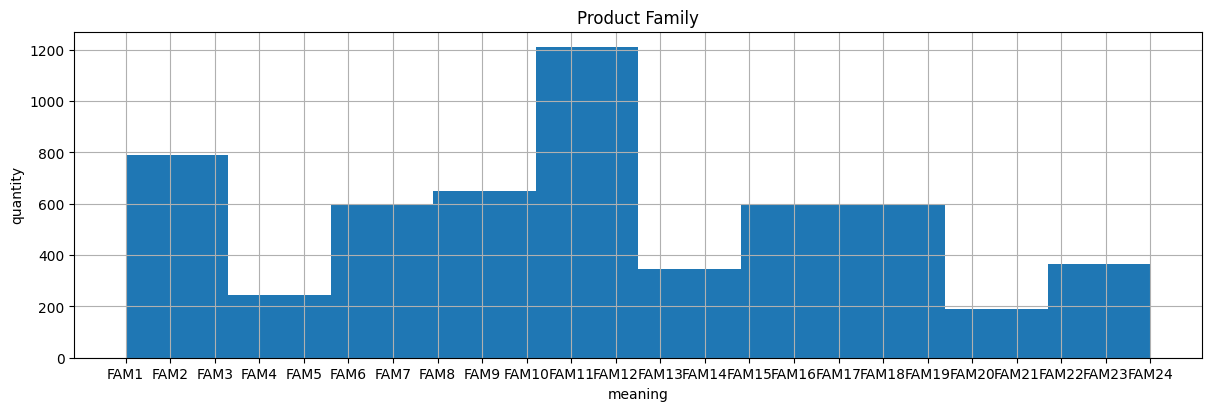

In [88]:
plt.figure(figsize=(12, 4), layout="constrained")
column_draw(sales, 'Product Family')

Попусков нет, признак категориальный. У нас 24 категории продуктов. Из гистограммы видно, что самые популярные в данных группы - 11 и 12 (суммарно чуть больше 40 процентов всех данных), наименее популярные - 4, 5, 20 и 21.

# Product

Предполагается, что это вид продукта, категориальный признак. Гистограмму строить не будем - скорее всего здесь много вариантов значений. Проверяем:

In [89]:
column_describe(sales, 'Product')

Количество уникальных значений = 56

Количество значений в стоблце:
Prd17    382
Prd32    298
Prd33    292
Prd27    264
Prd45    248
Prd30    236
Prd53    230
Prd44    218
Prd4     192
Prd46    184
Prd31    184
Prd37    182
Prd42    180
Prd43    174
Prd48    170
Prd47    166
Prd9     166
Prd19    102
Prd28     80
Prd11     80
Prd22     78
Prd10     78
Prd24     76
Prd26     76
Prd14     76
Prd8      74
Prd36     74
Prd38     72
Prd20     66
Prd34     64
Prd35     62
Prd16     60
Prd1      58
Prd2      58
Prd13     56
Prd40     54
Prd15     52
Prd54     52
Prd55     50
Prd21     48
Prd18     46
Prd12     44
Prd39     36
Prd56     32
Prd41     24
Prd25     18
Prd7      18
Prd5      10
Prd3       8
Prd52      6
Prd23      4
Prd49      4
Prd50      4
Prd51      4
Prd29      4
Prd6       2
Name: Product, dtype: int64


Итого, у нас 56 разных продуктов, явных пропусков нет, неявных - тоже. Есть как продукты, которые значительно представлены в выборке (более ста строк), так и те, которые представлены в единичных объёмах. Вопрос о репрезентативности статистики по таким продуктам будем рассматривать в соответствующем разделе, здесь же ограничимся пока кратким обзором.

## Customer

Категориальный признак с идентификатором покупателя. Предполагаем здесь большое количество разных значений, обзорную гистограмму тоже не будем строить.

In [90]:
column_describe(sales, 'Customer')

Количество уникальных значений = 37

Количество значений в стоблце:
Cust12    1016
Cust29     672
Cust27     546
Cust3      496
Cust30     486
Cust23     322
Cust5      286
Cust7      214
Cust17     192
Cust9      172
Cust6      154
Cust1      144
Cust28     122
Cust24      98
Cust10      96
Cust4       90
Cust11      64
Cust25      62
Cust26      60
Cust2       48
Cust34      40
Cust35      36
Cust31      34
Cust37      32
Cust22      16
Cust15      16
Cust21      14
Cust19      12
Cust8       10
Cust20       6
Cust18       4
Cust16       4
Cust13       4
Cust14       2
Cust32       2
Cust33       2
Cust36       2
Name: Customer, dtype: int64


Итого, у нас 37 уникальных покупателей, среди них есть как очень крупный (более тысячи покупок, возможно поставщик), так и постоянные клиенты (несколько сотен покупок), а также покупатели с разовыми покупками. Вероятно, при проведении исследовательского анализа можно будет разбить покупателей по группам, ориентируясь на количество покупок.

## Business Unit

Бизнес-единица - вероятно, дочерние компании. Предполагаем, что это качественный признак. Посмотрим на вариативность значений в этом столбце:

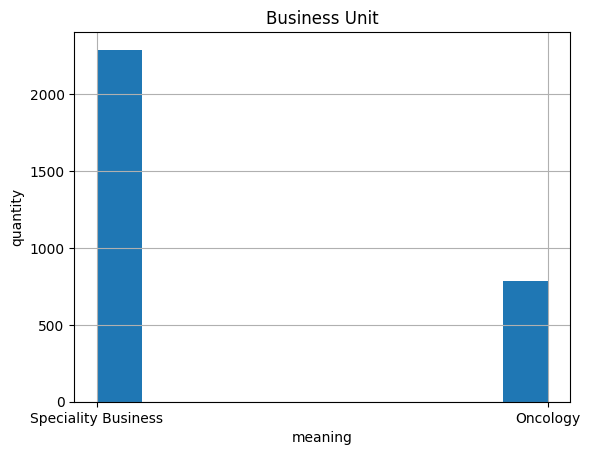

In [91]:
column_draw(sales, 'Business Unit')

Около половины датасета - Speciality Business, порядка 13 процентов - Онкология. Столбцец содержит пропуски. Предполагаем, что пропуск в данном случае соответствует ситуации, когда продажи были совершены напрямую компанией. Для удобства дальнейшей работы с данными заполняем пропуски заглушкой - пусть таким ситуациям соответствует значение "Head"

In [92]:
sales['Business Unit'] = sales['Business Unit'].fillna('Head')

Итого знаем, что чуть больше половины всех продах имеющейся выборки совершены напрямую компанией.

# Currency

Предположительно валюта, в которой был произведён расчёт. Посмотрим на значения:

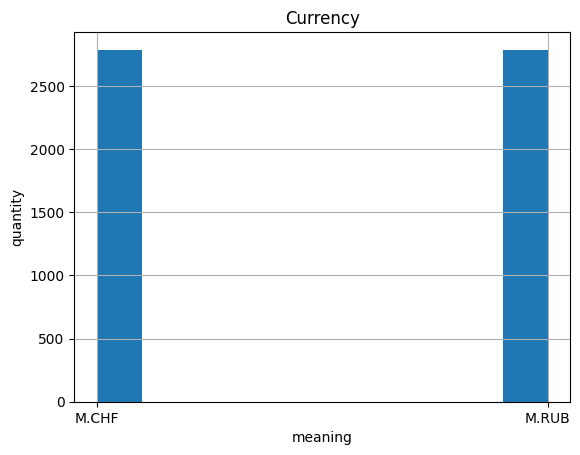

In [93]:
column_draw(sales, 'Currency')

Итого, у нас две валюты - российские рубли и швейцарские франки. Необходимо будет это учесть при сравнительном анализе, вычислении метрик и тд.

# Date

Следующий столбец хранит информацию о дате совершения сделки. Посмотрим на диапазон, покрывающийся имеющейся выборкой. Для удобства дальнейшей работы сначала преобразуем данные в более корректный формат. Посмотрим снова визуально на даты:

In [94]:
sales.head()

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales
0,FAM1,Prd1,Cust1,Head,M.CHF,2019-05-02 00:00:00,473885
1,FAM1,Prd1,Cust1,Head,M.CHF,28/02/2019 00:00:00,-23694
2,FAM1,Prd1,Cust1,Head,M.CHF,29/03/2019 00:00:00,23694
3,FAM1,Prd1,Cust1,Head,M.CHF,31/03/2019 00:00:00,-23694
4,FAM1,Prd1,Cust1,Head,M.CHF,15/04/2019 00:00:00,-23694


Даже по выведенным первым строчкам виден нюанс записи даты: могут использоваться разные разделители и формат записи.

In [95]:
def date_transformer(row):
  try:
    return pd.to_datetime(row['Date'], format='%Y-%m-%d %H:%M:%S')
  except:
    return pd.to_datetime(row['Date'], format='%d/%m/%Y %H:%M:%S')


In [96]:
sales['Date'] = sales.apply(date_transformer, axis=1)

In [97]:
#проверяем корректность преобразования
sales['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5576 entries, 0 to 5575
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5576 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 43.7 KB


Теперь можно исследовать имеющийся временной диапазон.

In [98]:
sales['Date'].describe(datetime_is_numeric=True)

count                             5576
mean     2019-10-04 04:56:28.235294208
min                2019-01-03 00:00:00
25%                2019-05-13 00:00:00
50%                2019-09-18 00:00:00
75%                2020-01-30 00:00:00
max                2020-12-05 00:00:00
Name: Date, dtype: object

Данные покрывают диапазон с 3 января 2019 года по 5 декабря 2020 года - то есть практически два года. Посмотрим на распределение:

<Axes: >

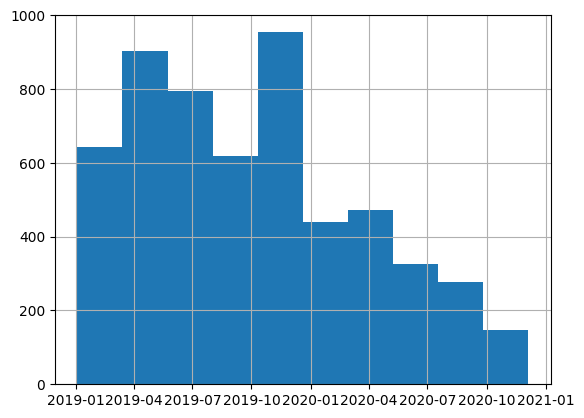

In [99]:
sales['Date'].dt.round('1D').hist()

Видны два явных пика - в середине и в конце 2019-го года. После 2020 виден явный спад по количеству сделок, представленных в данных. Если мы отталиваемся от репрезентативности выборки - можно предположить, что с 2020-го года стратегия продаж компании претерпела существенные изменения. Возможно, стала больше ориентироваться на крупные партии и оптовые поставки и/или перешла на экспорт и сделки за швейцарские франки :)

Выясним более детально в разделе, посвящённом исследовательскому анализу.

# Sales

Предполагаем, что это столбец, содержащий сумму сделки. Количественный признак. Посмотрим сначала на распределение значений "как есть":

In [100]:
sales['Sales'].describe()

count    5.576000e+03
mean     2.101602e+06
std      3.334958e+07
min     -4.270657e+08
25%      1.927750e+03
50%      2.671700e+04
75%      3.149420e+05
max      1.423552e+09
Name: Sales, dtype: float64

Обнаружена неочевидная проблема - данные о продажах не только положительные, но и отрицательные. Возможно, это могут быть суммы покупки и продажи (и наша фармацевтическая компания - ретейлер).

Посмотрим для примера историю по какому-нибудь одному продукту и покупателю и отсортируем по дате записи:

In [101]:
sales[(sales['Product']=='Prd1') & (sales['Customer']=='Cust1')].sort_values(by='Date')

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales
1,FAM1,Prd1,Cust1,Head,M.CHF,2019-02-28,-23694
30,FAM1,Prd1,Cust1,Head,M.RUB,2019-02-28,-1403616
2,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-29,23694
31,FAM1,Prd1,Cust1,Head,M.RUB,2019-03-29,1403616
3,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-31,-23694
32,FAM1,Prd1,Cust1,Head,M.RUB,2019-03-31,-1403616
4,FAM1,Prd1,Cust1,Head,M.CHF,2019-04-15,-23694
33,FAM1,Prd1,Cust1,Head,M.RUB,2019-04-15,-1403616
5,FAM1,Prd1,Cust1,Head,M.CHF,2019-04-30,23694
34,FAM1,Prd1,Cust1,Head,M.RUB,2019-04-30,1403616


Явно заметна следующая структура:

1. В каждую дату сделки записаны две транзакции - в рублях и в швейцарских франках. При делении одной суммы на другую получается значение, примерно соответсвующее курсу франка. Как следствие - можно предположить, что это одна и та же сделка, занесённая в базу дважды в разных валютах - в рублях и во франках. Вероятно, это связано с тем, что сделка совершена российской компанией на международном рынке за франки по текущему курсу.

2. Хорошо заметно, что большиснтво транзакций делится на пары - отрицательное и положительное значение с одинаковой абсолютной величиной.

3. Исходя из этого можно сделать вывод, что отрицательная сделка соответствует факту выставления счёта клиенту, а положительная - оплата счёта клиентом (поступление денег на рассчётный счёт компании).

4. Бывают исключения и артефакты - нулевые сделки (возможно, поставки рекламных или тестовых образцов, или же аннулированные счета), а также ситуации, когда отрицательная и положительная суммы не совпадают по модулю - возможно, это соответствует случаям, когда покупатель гасит задолженность в несколько платежей или работает с компанией на условиях рассрочки.

Таким образом, для выявления закономерностей и дальнейшего анализа можем учитывать сделки с положительной суммой, совершённые в рублях.

Промежуточный вывод: изучены данные по продажам фармацевтической компании. Все имеющиеся признаки кроме суммы продаж - категориальные. Заполнены явные пропуски в столбце с бизнес-единицей, данные в столбце с временем приведены к datetime формату с учётом обнаруженных различий в формате записи. Обнаружено, что каждая сделка дублируется в двух валютах - рублях и швейцарских франках. В данных также присутствуют транзакции с отрицательной суммой, предположительно соответствующие факту выставления счёта клиенту. Таким образом, для анализа дохода компании достаточно исследовать положительные транзакции в одной валюте. Предварительно выбраны рубли.

# Диагностированные пациенты

Следующий этап обзора данных - повторить шаги для имеющегося датасета по диагностированным пациентам. Начнём аналогично - с чтения и предварительного обзора.

In [103]:
patient = pd.read_excel('Russia Data Analyst Data Set_original (1).xlsx', sheet_name='Patient Flow')

In [104]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product Family      3132 non-null   object        
 1   Product             3132 non-null   object        
 2   Region EN           3132 non-null   object        
 3   Territory EN        3132 non-null   object        
 4   Date                3132 non-null   datetime64[ns]
 5   Diagnosed Patients  3132 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 146.9+ KB


В нашем распоряжении три тысячи строк, типы данных везде совпадают с ожидаемыми. Явных пропусков нет. Дальше изучим каждый столбец чуть более детально. там, где можно - попробуем провести параллели с уже имеющимися выводами предварительного обзора данных продаж.

## Product Family

Группа продукта.

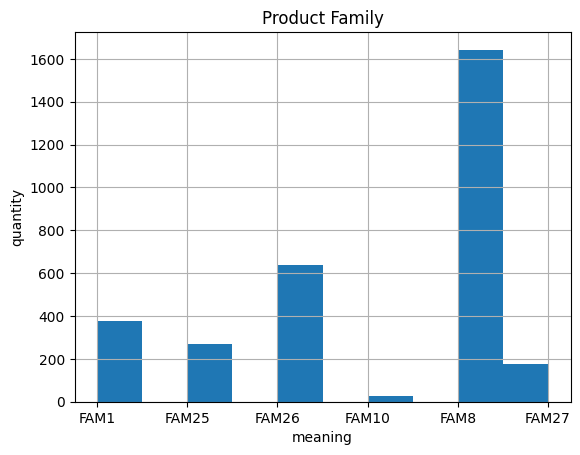

In [105]:
column_draw(patient, 'Product Family')

Из 24 групп, о существовании которых мы знаем (возможно их больше, но данные о них не вошли в имеющуюся выборку по продажам), исследовались всего шесть. Больше всего записей по группе 8 (половина данных), меньше всего - по группе 10. Однако, всегда есть вероятность, что в рамках этой группы было проведено одно большое исследование с сотнями пациентов, попавшее в одну запись :) Изучим этот вопрос дополнительно.

## Product

Аналогично посмотрим на исследованные продукты:

In [106]:
column_describe(patient, 'Product')

Количество уникальных значений = 11

Количество значений в стоблце:
Prd21    1643
Prd63     669
Prd2      305
Prd6      270
Prd20     102
Prd62      97
Prd59      22
Prd57       8
Prd60       8
Prd58       5
Prd61       3
Name: Product, dtype: int64


Изучены 11 продуктов, среди них есть исследования, которые можно назвать массовыми (сотни записей), так и единичные испытания - явно заметен скачок с 20 пациентов до значений порядка сотни.

## Region

Вероятно, регион проживания пациента. Что ж, посмотрим на географию проведённых исследований:

In [107]:
column_describe(patient, 'Region EN')

Количество уникальных значений = 8

Количество значений в стоблце:
Southern                530
Volga                   512
Moscow                  486
North-West              384
Central                 330
E.Siberia & Far East    323
Ural & W.Siberia        314
Moscow Region           253
Name: Region EN, dtype: int64


Видим восемь регионов, соответствующих списку регионов по данным Росстат - значит, предполагается, что были проведены довольно масштабные исследования с учётом жителей всех регионов России. Дополним картину дополнительным изучением следующего столбца:

## Territory

Территория проживания? Посмотрим на значения:

In [108]:
column_describe(patient, 'Territory EN')

Количество уникальных значений = 82

Количество значений в стоблце:
Moscow                      486
Moscow Region               253
Saint Petersburg            174
Krasnodar Oblast            142
Rostov Oblast               121
                           ... 
Kamchatka Oblast              5
Nenets Autonomous Okrug       3
Tyva Republic                 3
Magadan Oblast                1
Jewish Autonomous Oblast      1
Name: Territory EN, Length: 82, dtype: int64


Почти полный список всех областей РФ :) Обращаем внимание, что большая часть - Москва и область, Питер и крупные южные населённые пункты, что логично. Вероятнее всего, информация была нужна на этапе формирования выборки пациентов и контроля её репрезентативности и вряд ли будет для нас полезна.

## Date

Предварительная гипотеза такова, что срок проведения исследований по каждому продукту - самая ценная информация в этом датасете, так как можно оценить влияние проведения испытаний на изменение продаж препарата. Однако, в рамках предварительного обзора посмотрим только на временной период, покрываемый имеющимися данными:

In [109]:
patient['Date'].describe(datetime_is_numeric=True)

count                             3132
mean     2019-10-29 09:26:26.206896384
min                2019-01-01 00:00:00
25%                2019-06-02 00:00:00
50%                2019-11-03 00:00:00
75%                2020-04-01 00:00:00
max                2020-08-01 00:00:00
Name: Date, dtype: object

Временной диапазон - с 1 января 2019 года по 1 августа 2020-го. Данные по продажам - с начала 19-ого года по конец 20-ого, то есть по крайней мере по некоторым продуктам скорее всего будет возможность оценить влияние испытаний препарата на его продажи.

## Diagnosed Patients

Количество продиагностированных пациентов. Посмотрим на распределение:

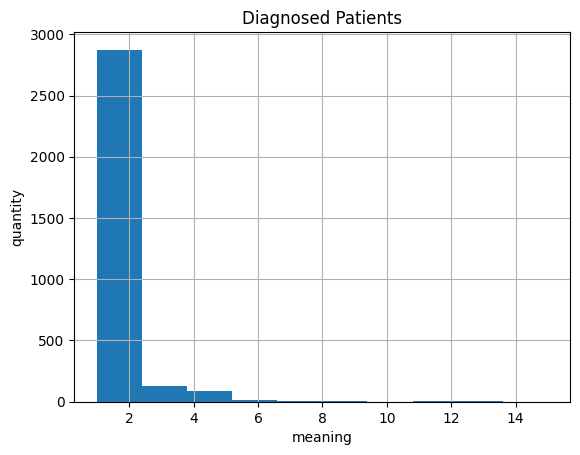

In [110]:
column_draw(patient, 'Diagnosed Patients')

По распределению хорошо видно, что подавляющее большинство записей - это исследования 1-2 пациентов. Штучное количество записей- от 6 до 14 пациентов.

Промежуточный вывод:

Изучены данные по диагностированию пациентов. Датасет состоит из трёх тысяч строк и шести столбцов, явных и неявных пропусков не обнаружено, явных аномалий в данных не найдено. Исследования проводились по шести продуктовым группам, что составляет четверть общего количества групп по имеющимся у нас данным. Изучены 11 продуктов. Преимущественно одна запись соответствует 1-2 пациентам. География обследованных пациентов - вся Россия, что позволяет сделать гипотезу о корректности составленной выборки при проведении испытаний. Дополнительно стоит отметить, что временной период покрывает интервал с начала 2019-го года по август 2020-го, что предварительно позволит оценить влияние исследований на изменение продаж соответствующего продукта или, вероятно, продуктовой группы.

# Исследовательский анализ данных

Данный раздел посвящён более глубокому анализу и поиску закономерностей и взаимосвязей.

## Время исследования для каждой группы продуктов и конкретного продукта

Для анализа влияния исследования на изменение продаж сначала проанализируем длительность и время исследований по каждому продукту и группе продуктов.

Сначала по группам продуктов:

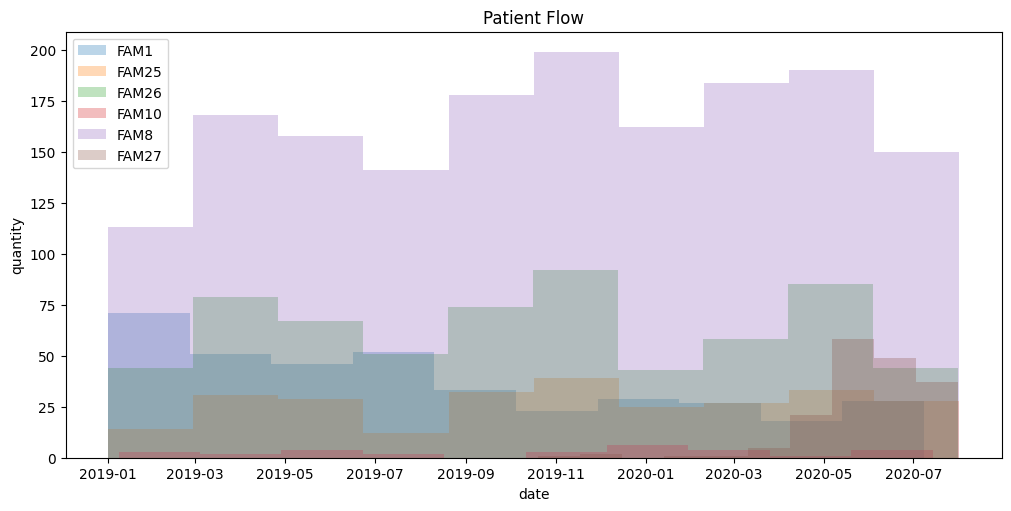

In [111]:
plt.figure(figsize=(10, 5), layout="constrained")
for fam in patient['Product Family'].unique():
  plt.hist(patient[patient['Product Family']==fam]['Date'], label = str(fam), alpha=.3)
plt.xlabel("date")
plt.ylabel('quantity')
plt.legend()
plt.title("Patient Flow")
plt.show()


Видно, что освещаемый данными период затрагивает все группы продуктов, то есть исследования велись параллельно. Есть вероятность, что в июле 2020-го исследования не остановились, просто дальнейшие данные нам не предоставлены.

Теперь посмотрим данные по каждому продукту внутри групп:

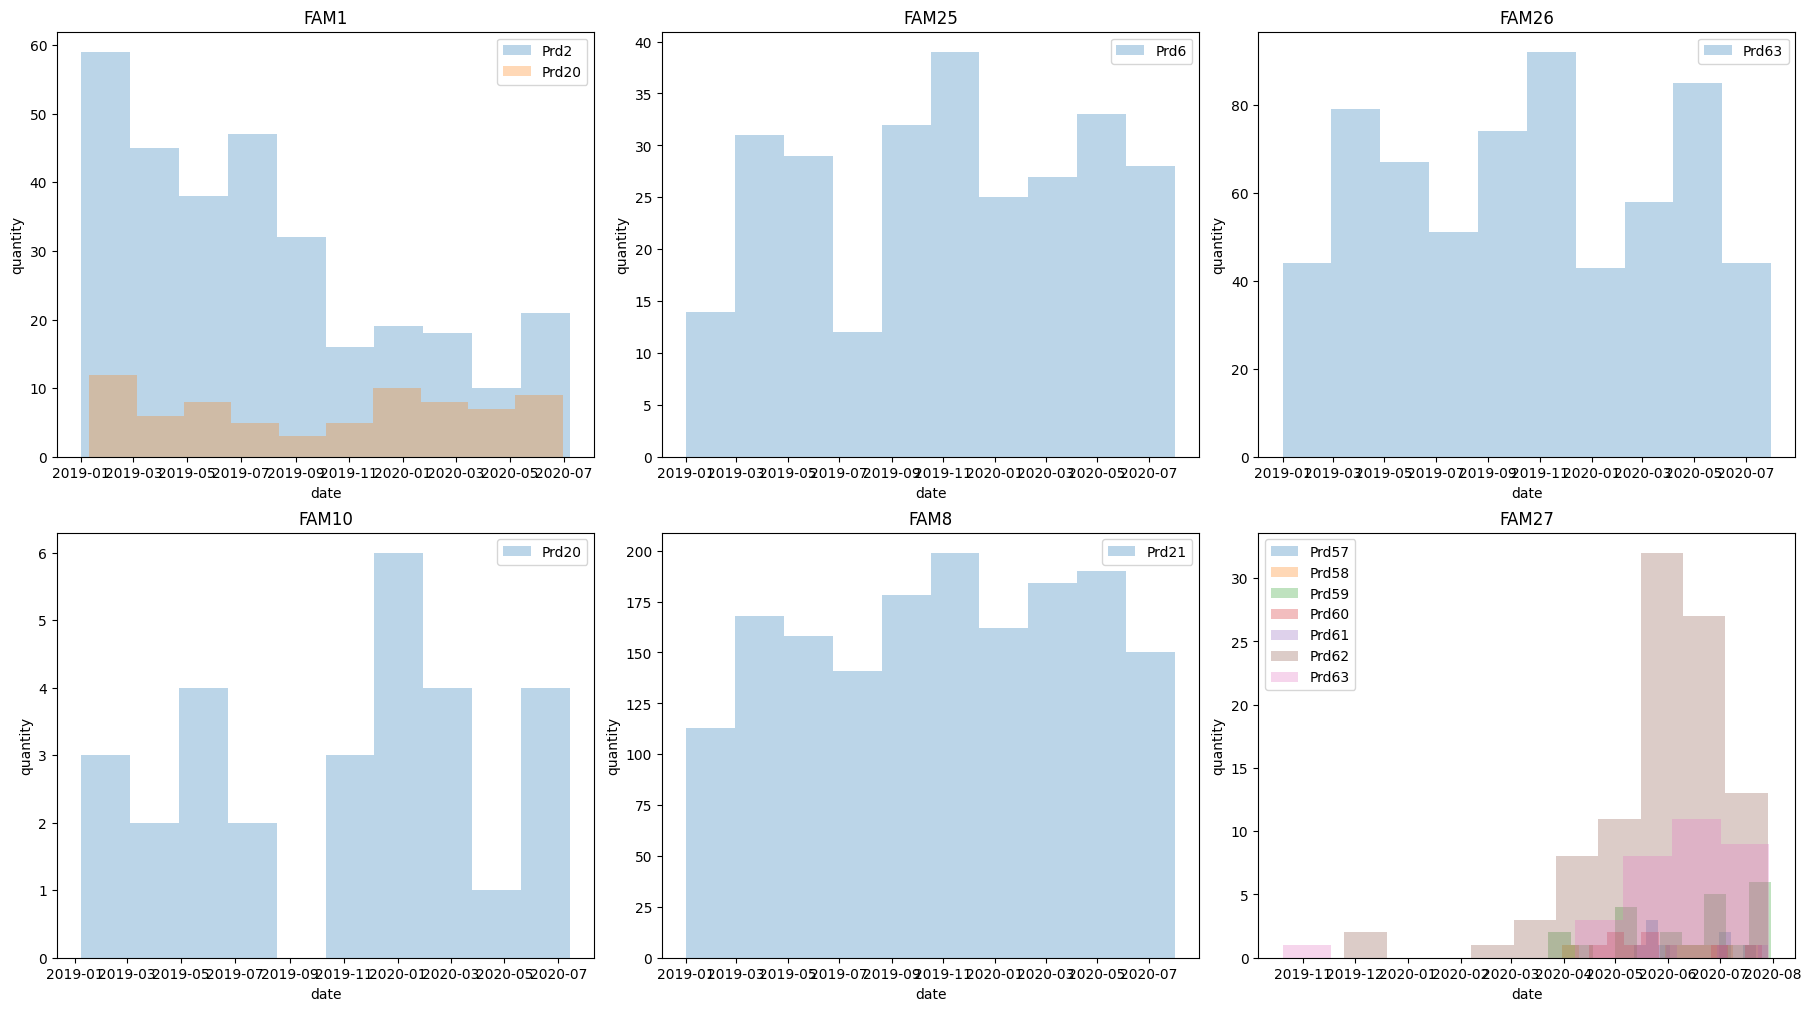

In [112]:
plt.figure(figsize=(18, 10), layout="constrained")
fam_array = patient['Product Family'].unique()

for i in range(len(patient['Product Family'].unique())):
  plt.subplot(2, 3, i+1)
  for prod in patient[patient['Product Family']==fam_array[i]]['Product'].unique():
    plt.hist(patient[(patient['Product Family']==fam_array[i]) & (patient['Product']==prod)]['Date'], label = str(prod), alpha=.3)
  plt.xlabel("date")
  plt.ylabel('quantity')
  plt.legend()
  plt.title(str(fam_array[i]))
plt.show()


А вот здесь уже можно заметить некоторые закономерности:

1. Видно, что некоторые продукты повторяются в рамках исследования разных групп - например, продукт 20 встречается и в 1, и в 10 группе. Разная цель исследований? Есть вероятность, что уникальный идентификатор продукта - пара из группы и индивидуального кода, но это было бы не очень удобно с точки зрения хранения и выгрузки информации, так что отбросим эту мысль и будем считать это одним продуктом, исследование которого проводилось в двух различных плоскостях.

2. В группах 25 и 26 видны три явных пика, примерно совпадающих по датам - возможно, это схожие или сильно связанные группы.

3. Исследование группы 8 практически равномерно, с неявно выраженными пиками в тех же временных интервалах

4. Существенных статистически значимых выводов по исследованию группы 10 сделать нельзя - данные по ней единичные

5. Существенно отличается характер исследований для группы 27 - тут и совсем виной вид распределения с явно выраженным пиком (обрезанный Гаусс), и большое количество исследуемых препаратов (7 против 1-2 в остальных группах). Возможно, была применена качественно иная методология. Видно, что основной процесс начался в 2020-ом году, хотя единичные всплески приходятся на конец 2019-ого. Возможно, это тестирование новых разработок.


Гипотеза: пики в группах 25, 26 и 8 связаны с исследованиями в крупных населённых пунктах. Проверим:

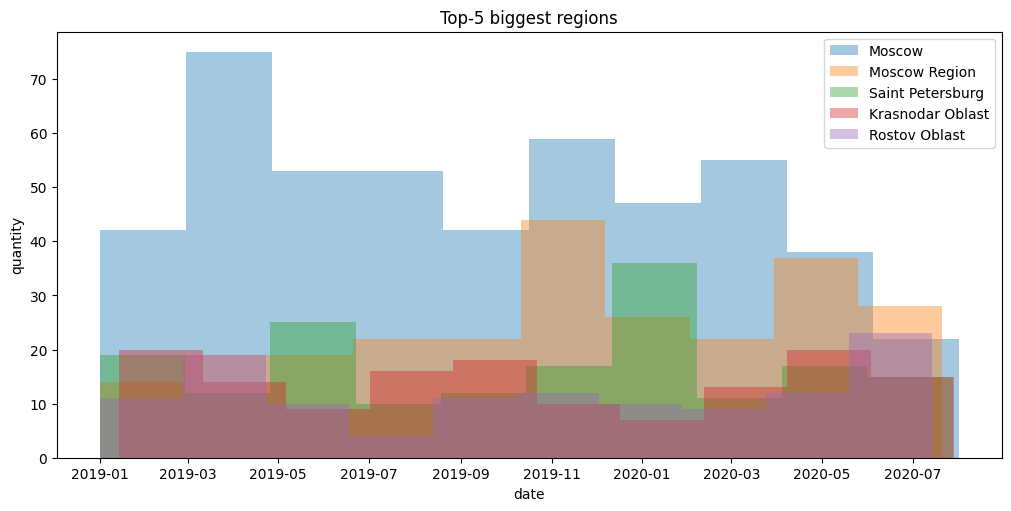

In [113]:
plt.figure(figsize=(10, 5), layout="constrained")
for reg in patient['Territory EN'].value_counts()[:5].index:
  plt.hist(patient[patient['Territory EN']==reg]['Date'], label = str(reg), alpha=.4)
plt.xlabel("date")
plt.ylabel('quantity')
plt.legend()
plt.title("Top-5 biggest regions")
plt.show()


Гипотеза подтвердилась. Явно видно, что пик в марте 2019-го года - это большое количество исследованных москвичей, пик ноября 2019ого и начала 2020-го - это Московская область и Питер, а май 2020го - это снова Москва и область с лёгким налётом Краснодарского края.

В качестве завершающего штриха посмотрим на количество продуктов в каждой группе по имеющимся данным продаж:

In [114]:
sales.pivot_table(index=['Product Family'], values='Product', aggfunc='nunique').sort_index()

,Product
Product Family,
FAM1,6
FAM10,4
FAM11,4
FAM12,3
FAM13,3
FAM14,1
FAM15,1
FAM16,2
FAM17,1


Ещё одна новость: по самым "красивым" исследованиям препаратов из группы 27 данных по продажам ещё нет - вероятно, препараты находятся на стадии клинических испытаний. Аналогично можно сказать по группам 25 и 26. Статистика по группе 8 до неприличия мала, итого с точки зрения влияния на продажи можем оценить только две группы - 1 (исследованы 2 препарата из 6) и 8 (исследован один препарат из 4).

## Динамика продаж

Посмотрим на то, меняется ли количество клиентов с течением времени. Отметим пока, что постоянные клиенты могут не делать закупки ежемесячно - в любом случае, на периодичность тоже постараемся обратить внимание.

In [115]:
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month

In [116]:
num_customers = sales.pivot_table(index=['Year', 'Month'],
                                  values='Customer', aggfunc='nunique').reset_index()

Для удобства интерпритации оформим это в графическое представление

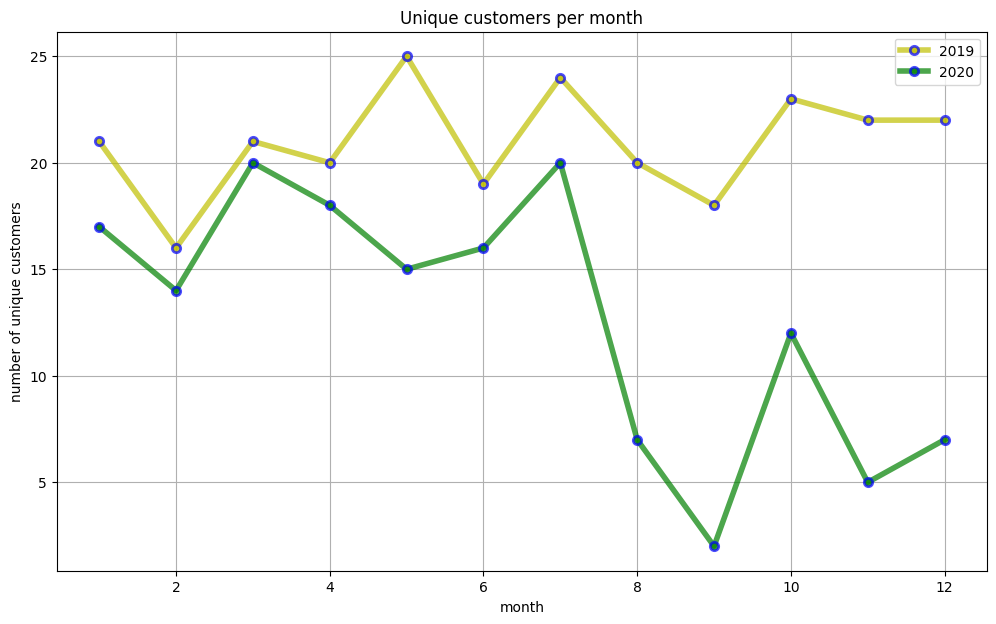

In [130]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g']
for year, col in zip(num_customers['Year'].unique(), col_palette):
  plt.plot(num_customers[num_customers['Year']==year]['Month'],
          num_customers[num_customers['Year']==year]['Customer'],
          'o-r', color=col, alpha=0.7, label=str(year), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('number of unique customers')
plt.title('Unique customers per month')
plt.legend()
plt.grid(True)

Хорошо видны несколько закономерностей:

1. В целом можно сказать, что в 2020-ом году количество уникальных покупателей в каждом месяце упало по сравнению с 2019-ым годом.

2. Хорошо заметны повторяющиеся паттерны в сезонности: в феврале продажи падают по сравнению с январём, затем увеливаются в марте.

3. Аналогично заметно, что самый "шопинг" летний месяц - июль.

4. Явно заметно, что в 2020-ом году спад августа и сентября намного более резкий по сравнению с предыдущим годом. Однако помним, что это как раз время, когда активно проводились исследования продуктовой группы FAM27 - вероятно, спад продаж может быть связан со смещением фокуса компании с продаж на проведение исследований новой группы препаратов.

Сделаем аналогичное сравнение для ежемесячной прибыли. По результатам предварительного обзора данных учитываем только положительные транзакции

In [134]:
sales_per_month = sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0)].\
  pivot_table(index=['Year', 'Month'], values='Sales', aggfunc='sum').reset_index()

Строим зависимости для удобства и наглядного представления:

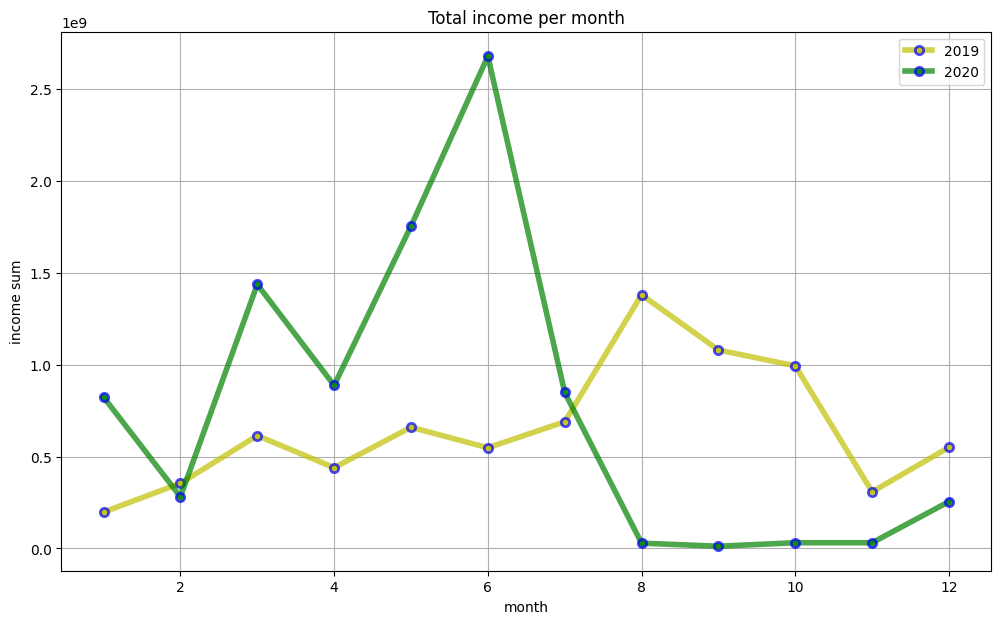

In [138]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g']
for year, col in zip(sales_per_month['Year'].unique(), col_palette):
  plt.plot(sales_per_month[sales_per_month['Year']==year]['Month'],
          sales_per_month[sales_per_month['Year']==year]['Sales'],
          'o-r', color=col, alpha=0.7, label=str(year), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('income sum')
plt.title('Total income per month')
plt.legend()
plt.grid(True)

А вот здесь интереснее!

1. В целом можно сказать, что в 2019-ом году заметен восходящий тренд, пик продаж приходится на август, самые провальные месяцы - январь (ожидаемо для начала года) и ноябрь.

2. Однако, по предыдущему графику количества покупателей знаем, что в ноябре их количество близко к максимальному - значит, в основном это были небольшие заказы - возможно, частные дистрибьютеры, мелкий опт и тд

3. В 2020ом году заметен резкий рост(более чем в два раза) с февраля по июнь. С учётом того, что количество клиентов почти не меняется - можно сделать вывод о том, что клиенты стали делать более крупные заказы.

4. Хорошо заметен сильнейший спад продаж начиная с июля-августа 2020-го года. Из построенных распределений по исследованиям пациентов помним, что среди продуктов, уже присутствующих на рынке - группа 1(продукты 2 и 10) и группа 8 (продукт 21). Гипотеза: возможно, компания вывела эти продукты из продаж по результатам исследований, посчитав их недостаточно эффективными. Можно также предположить, что новые группы препаратов - 25, 26 и 27 в том или ином виде могут являться заменой.

Проверим эту гипотезу, посмотрев на статистику продаж данных продуктов:

In [152]:
for prd in ['Prd2', 'Prd10', 'Prd21']:
  print(f'Продажи по месяцам для продукта {prd}')
  print(sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0) & (sales['Product']==prd)].\
    pivot_table(index=['Year', 'Month'], values='Sales', aggfunc='sum').reset_index())
  print()

Продажи по месяцам для продукта Prd2
   Year  Month      Sales
0  2019      3    7017875
1  2019      4    7017875
2  2019      5  262373099
3  2019      6   20352961
4  2019     10  357350218
5  2020      4   97666569
6  2020      5  110638907
7  2020     12  112260424

Продажи по месяцам для продукта Prd10
    Year  Month    Sales
0   2019      1  1872472
1   2019      3   431446
2   2019      4    43144
3   2019      5   207094
4   2019      7   673054
5   2019      8    43145
6   2019      9     4314
7   2019     10     4314
8   2019     11   651482
9   2019     12   276126
10  2020      1   116463
11  2020      2   107837
12  2020      3   172539
13  2020      4    51762
14  2020      5   301943
15  2020      6     4313
16  2020      7     8627
17  2020     10   332137
18  2020     11    17254

Продажи по месяцам для продукта Prd21
   Year  Month      Sales
0  2019      2  193726298
1  2019      4   96863149
2  2019      8  155588807
3  2019     11   87176834
4  2020      1   9684

Видно, что гипотеза частично подтвердилась: после июля совсем нет продаж по продукту 21 - то есть как рза тогда, когда закончились его исследования. Вероятно, либо, что вероятнее, компания самостоятельно отозвала продукт из продажи по результатам исследований, либо после публикации результатов продукт перестал быть интересным для поставщиков. Однако, статистика предыдущих продаж говорит о высоком потенциале доходности данного продукта - возможно, это продукт, хорошо попадавший в потребности целевых потребителей. В связи с этим можно было бы порекомендовать компании вывести на рынок схожий продукт (или понадеяться, что продукты группы 27, находящийся в стадии активных исследований, как раз является такой заменой).

Несмотря на отсутствие вводных данных по компании, можно сделать предположение о том, что это - крупная (судя по объёмам продаж) фармачевтическая компания, дорожащая своей репутацией -ведь несмотря на невыгодность с точки зрения прибыли, она сняла с продажи препарат, показавший себя, вероятно, с негативной стороны (возможно, обнаружены недопустимые побочные эффекты или эффективность препарата оказалась значимо ниже ожидаемой)



В качестве завершающего штриха этой части посмотрим на среднемесячный доход с одного клиента в статистике по месяцам

In [174]:
sales_per_month['Num of customers'] = num_customers['Customer']

In [175]:
sales_per_month['Avg sales'] = sales_per_month['Sales'] / sales_per_month['Num of customers']

Сразу представляем это графически:

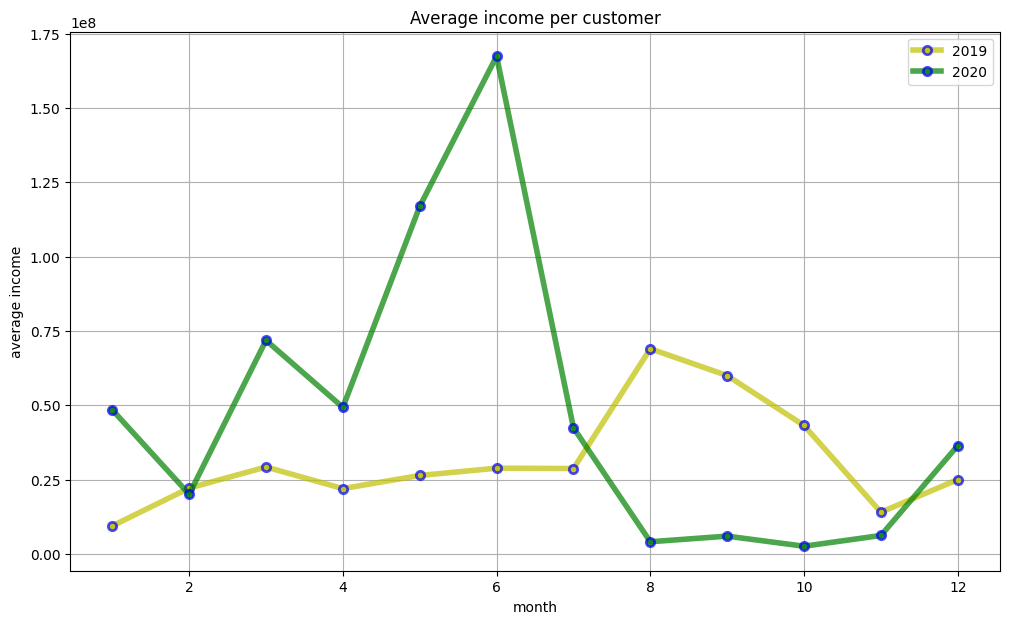

In [178]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g']
for year, col in zip(sales_per_month['Year'].unique(), col_palette):
  plt.plot(sales_per_month[sales_per_month['Year']==year]['Month'],
          sales_per_month[sales_per_month['Year']==year]['Avg sales'],
          'o-r', color=col, alpha=0.7, label=str(year), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('average income')
plt.title('Average income per customer')
plt.legend()
plt.grid(True)

Здесь без неожиданных инсайтов: характер зависимости максимально похож на аналогичный график для суммы дохода по месяцам - значит, изменения не зависели от масштабирования бизнеса, а скорее являются следствием стратегии ведения бизнеса компании.

Посмотрим теперь более детально на продажи каждой группы продуктов в 2020 году:

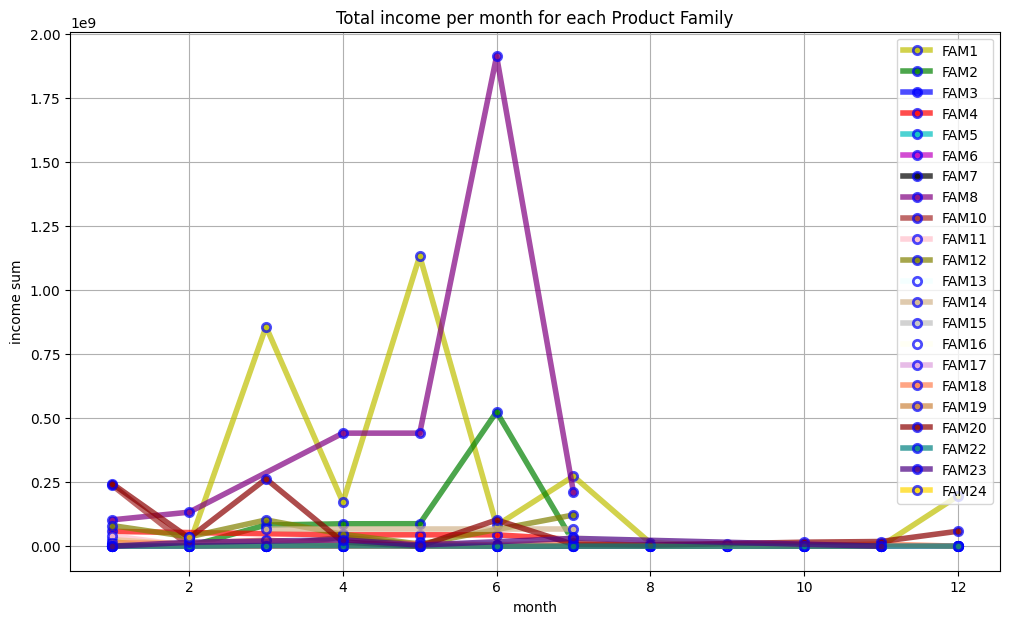

In [167]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g', 'b', 'r', 'c', 'm', 'k', 'purple', 'brown', 'pink', 'olive',
               'azure', 'tan', 'silver', 'ivory', 'plum', 'coral', 'peru', 'darkred',
               'teal', 'indigo', 'gold', 'khaki', 'aqua']
for fam, col in zip(sales[sales['Year']==2020]['Product Family'].unique(), col_palette):
  tmp_table = sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0) & (sales['Product Family']==fam) & (sales['Year']==2020)].\
    pivot_table(index=['Month'], values='Sales', aggfunc='sum').reset_index()
  plt.plot(tmp_table['Month'], tmp_table['Sales'],
          'o-r', color=col, alpha=0.7, label=str(fam), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('income sum')
plt.title('Total income per month for each Product Family')
plt.legend()
plt.grid(True)

Можно заметить, что в 2020-ом "делают кассу" нашей компании в основном всего две группы - первая (а у нас как раз есть данные по тому, что по этой группе проводились исследования пациентов) и восьмая с её 21-ым продуктом, вероятно выведенным из продажи по результатам исследований. Здесь же можно дополнительно обратить внимание на совет как можно скорее найти замену выведенному из продаж продукту или сменить маркетинговую стратегию для того, чтобы сфокусироваться на продажах иных имеющихся продуктов.

БИЗНЕС-ЕДИНИЦА!!!!

In [179]:
sales.head()

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales,Year,Month
0,FAM1,Prd1,Cust1,Head,M.CHF,2019-05-02,473885,2019,5
1,FAM1,Prd1,Cust1,Head,M.CHF,2019-02-28,-23694,2019,2
2,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-29,23694,2019,3
3,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-31,-23694,2019,3
4,FAM1,Prd1,Cust1,Head,M.CHF,2019-04-15,-23694,2019,4


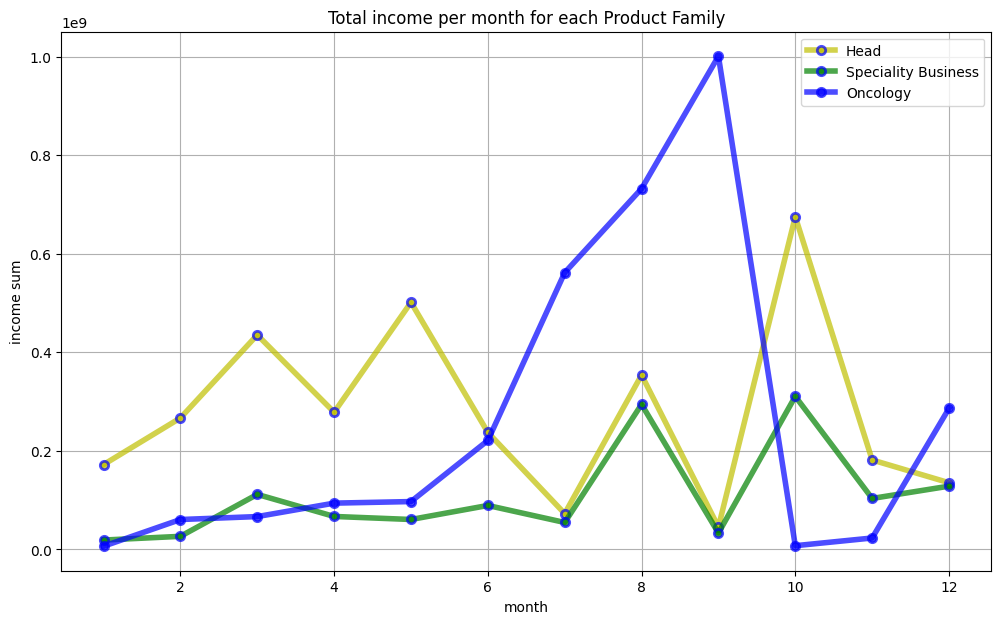

In [182]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g', 'b']
for fam, col in zip(sales[sales['Year']==2019]['Business Unit'].unique(), col_palette):
  tmp_table = sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0) & (sales['Business Unit']==fam) & (sales['Year']==2019)].\
    pivot_table(index=['Month'], values='Sales', aggfunc='sum').reset_index()
  plt.plot(tmp_table['Month'], tmp_table['Sales'],
          'o-r', color=col, alpha=0.7, label=str(fam), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('income sum')
plt.title('Total income per month for each Product Family')
plt.legend()
plt.grid(True)

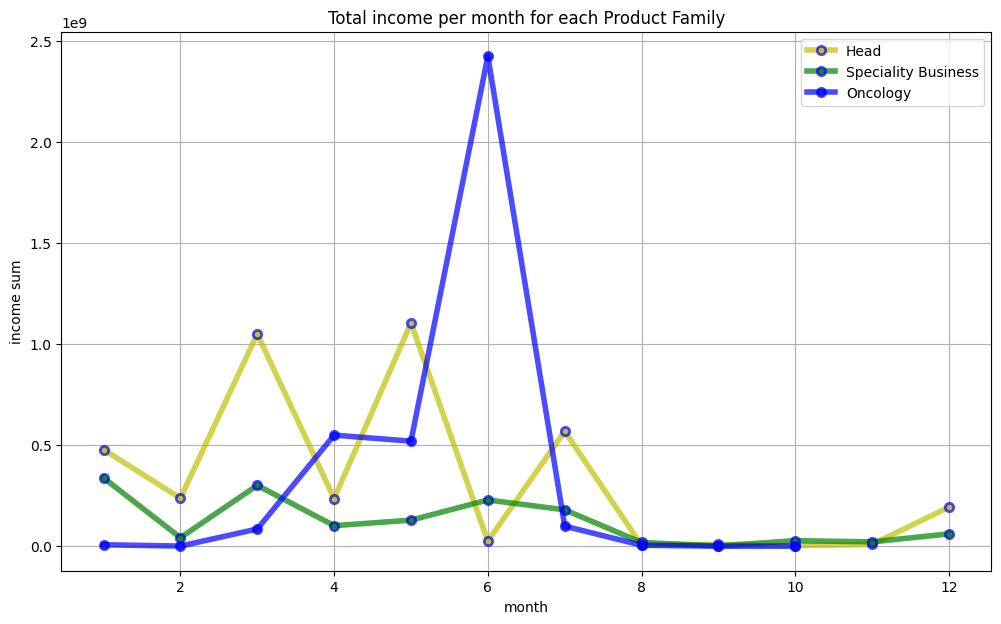

In [180]:
plt.figure(figsize=(12, 7))
col_palette = ['y', 'g', 'b']
for fam, col in zip(sales[sales['Year']==2020]['Business Unit'].unique(), col_palette):
  tmp_table = sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0) & (sales['Business Unit']==fam) & (sales['Year']==2020)].\
    pivot_table(index=['Month'], values='Sales', aggfunc='sum').reset_index()
  plt.plot(tmp_table['Month'], tmp_table['Sales'],
          'o-r', color=col, alpha=0.7, label=str(fam), lw=4, mec='b', mew=2, ms=6)
plt.xlabel('month')
plt.ylabel('income sum')
plt.title('Total income per month for each Product Family')
plt.legend()
plt.grid(True)

# Общий вывод

Проведены чтение и первыичный обзор данных. В нашем распоряжении два датасета - с данными продаж и с обследованием пациентов.

Выполнена предобработка данных по продажам - заполнены явные пропуски, выполнено преобразование типов данных там, где это необходимо. Обнаружено, что каждая сделка дублируется в двух валютах - рублях и швейцарских франках. Исходя из того, что в датасете по обследованию пациентов география Российских областей, и часть обследованных препаратов отсутствуют в продажах - можно предположить, что компания, изучаемая нами, является производителем (а не покупателем), а покупатели - швейцарские дистрибьюторы.  

Среди данных обследований обнаружено, что исследовано было шести продуктовым группам, что составляет четверть общего количества групп по имеющимся у нас данным. Изучены 11 продуктов. Преимущественно одна запись соответствует 1-2 пациентам. География обследованных пациентов - вся Россия, что позволяет сделать гипотезу о корректности составленной выборки при проведении испытаний.

В рамках исследовательского анализа данных рассмотрены: ежемесячная прибыль, количество клиентов, среднее ежемесячное значение прибыли  на одного клиента, а также ежемесячный доход с каждой продуктовой группы в 2020-ом году.Обнаружен существенный спад продаж с июля 2020-го года. Если учесть, что это коррелирует с датой окончания исследований соответствующих продуктовых групп - можно сделать предположение о том, что препарат группы 8 выведен из продажи по результатам этих исследований. Однако стоит обратить существенное внимание на то, что продажи этой группы составляют большую чатсь ежемесячного дохода компании, поэтому среди важных рекомендаций - поиск альтернативы или изменение фокуса рекламной стратегии на продажи иного препарата.

Среди предложений по потенциальному дальнейшему развитию проекта можно отметить построение предсказательной модели продаж на следующий месяц по каждой продуктовой группе и/или продукту - то есть решение задачи регрессии. Также при наличии описательных данных клиентов (покупателей) можно было бы разбить клиентов на сегменты, выявить характерный портрет внутри каждого сегмента и использовать для рекомендательной системы точечного предложения новых разработанных продуктов/групп продуктов конкретным, основываясь на их схожести с уже имеющимися в ассортименте.